<a href="https://colab.research.google.com/github/AlexanderSychev2005/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Twitter Sentiment Dataset

## Importing the dataset from the Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis


## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_dataset = pd.read_csv(f'{path}/twitter_training.csv')
val_dataset = pd.read_csv(f'{path}/twitter_validation.csv')

In [ ]:
train_dataset.head()

,TweetId,Topic,Sentiment,Content,CleanText
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,"coming borders kill all,"
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,"
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,"im coming borderlands murder all,"
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"im getting borderlands murder all,"
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,"im getting borderlands murder all,"


## Data Cleaning/Preprocessing

In [ ]:
train_cols = ["TweetId", "Topic", "Sentiment", "Content"]
train_dataset.columns = train_cols

In [ ]:
train_dataset.head()

,TweetId,Topic,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
train_dataset.isna().sum()

,0
TweetId,0
Topic,0
Sentiment,0
Content,686


In [ ]:
train_dataset = train_dataset.dropna()

In [ ]:
train_dataset.isna().sum()

,0
TweetId,0
Topic,0
Sentiment,0
Content,0


In [ ]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
  text = text.lower()
  patterns = re.compile(
      "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE
  )

  text = patterns.sub(r'', text)

  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  text = re.sub(r'http\S+|www\S+', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'<unk>', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  text = ' '.join([word for word in text.split() if word not in set(all_stopwords)])
  return text if text else None



In [ ]:
train_dataset['CleanText'] = train_dataset['Content'].apply(preprocess_text)

In [ ]:
train_dataset['CleanText'].head(30)

,CleanText
0,"coming borders kill all,"
1,"im getting borderlands kill all,"
2,"im coming borderlands murder all,"
3,"im getting borderlands murder all,"
4,"im getting borderlands murder all,"
5,spent hours making something fun. . . know hug...
6,spent couple hours something fun... know huge ...
7,spent hours something fun... know huge @ borde...
8,spent hours making something fun. . . know hug...
9,spent hours making something fun. . . know hug...


In [ ]:
train_dataset.isna().sum()

,0
TweetId,0
Topic,0
Sentiment,0
Content,0
CleanText,1571


In [ ]:
train_dataset = train_dataset.dropna()

In [ ]:
train_dataset.isna().sum()

,0
TweetId,0
Topic,0
Sentiment,0
Content,0
CleanText,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

encounter = LabelEncoder()
train_dataset['Sentiment'] = encounter.fit_transform(train_dataset['Sentiment'])

<ipython-input-170-40403fc1497b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['Sentiment'] = encounter.fit_transform(train_dataset['Sentiment'])


In [ ]:
X = train_dataset['CleanText']
y = train_dataset['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Exploratory Data Analysis (EDA)

In [ ]:
x=train_dataset['Sentiment'].value_counts()

<ipython-input-160-600239fc2689>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x.index, y=x.values, palette="viridis")


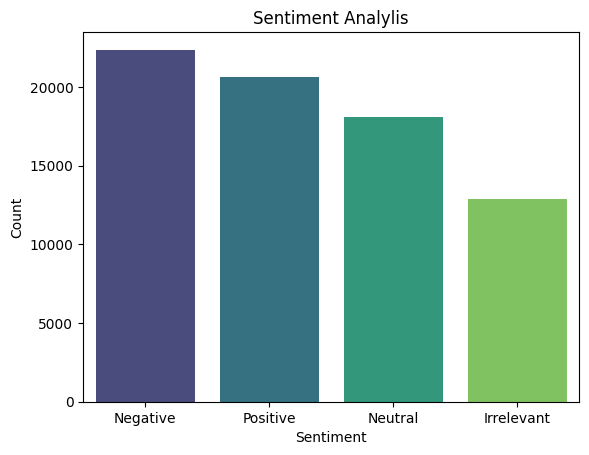

In [ ]:
sns.barplot(x=x.index, y=x.values, palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analylis")
plt.show()

In [ ]:
y = train_dataset['Topic'].value_counts()

<ipython-input-162-643ec7976f7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = y.index, y=y.values, palette="viridis" )


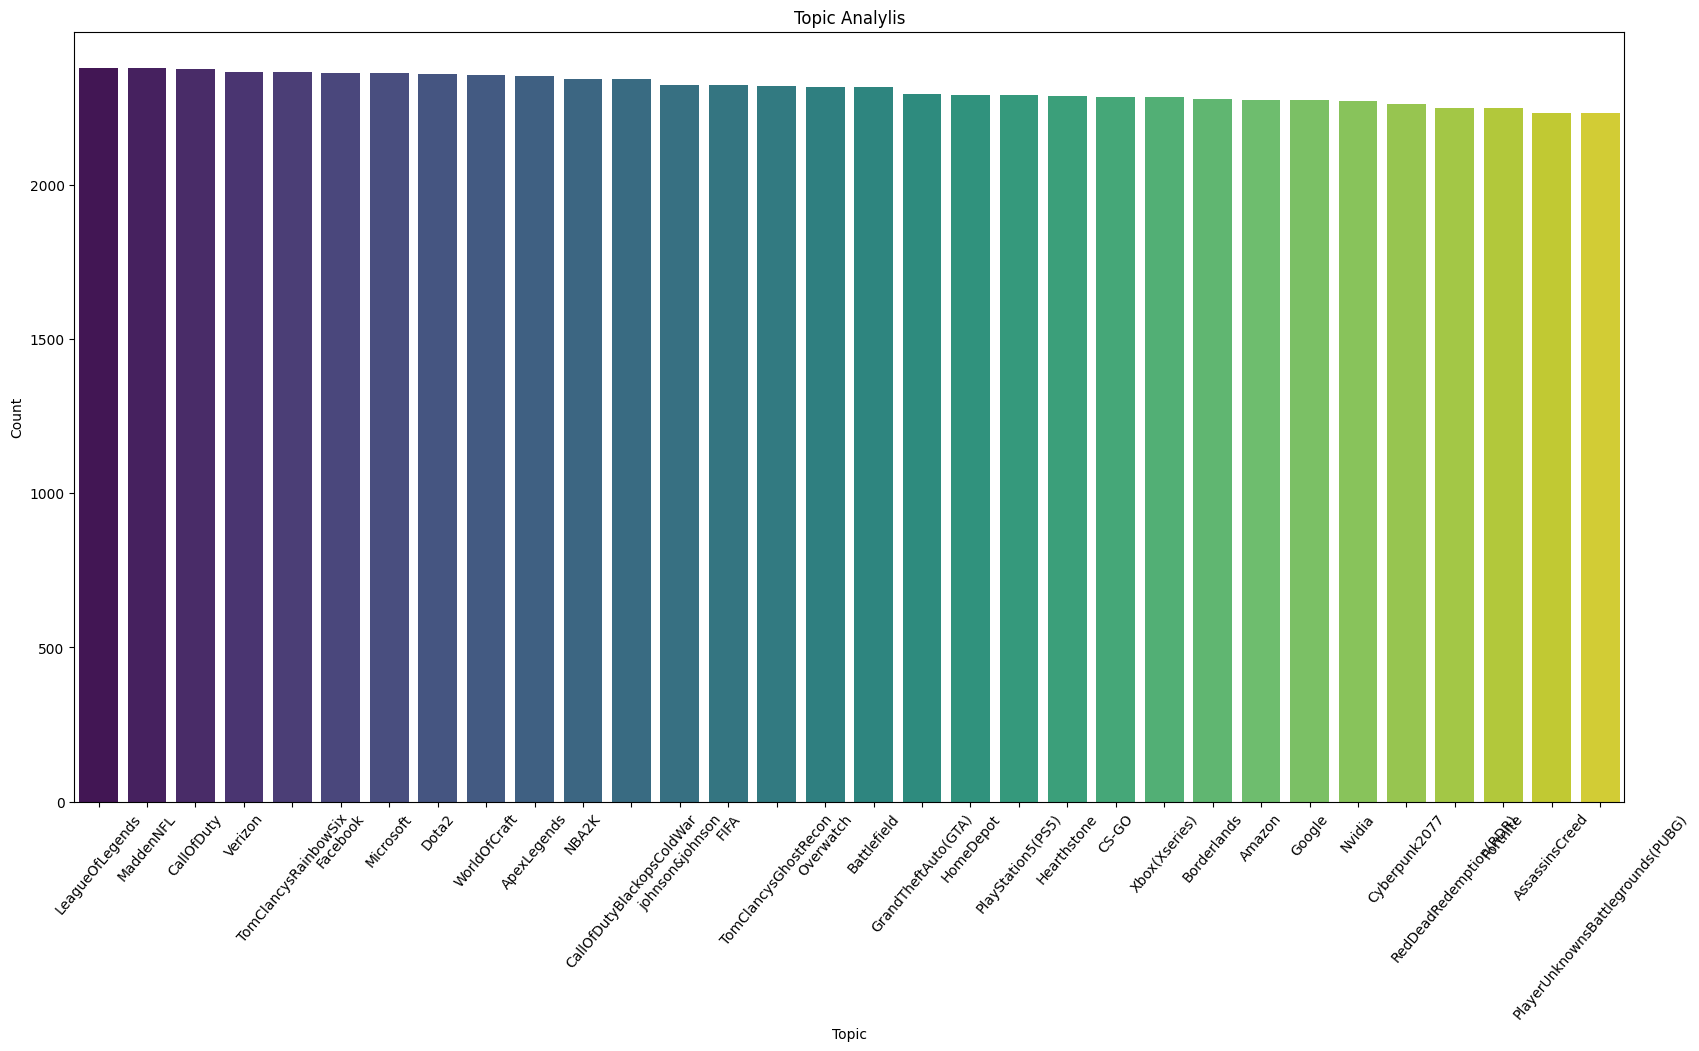

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x = y.index, y=y.values, palette="viridis" )
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Topic Analylis")
plt.xticks(rotation=50)
plt.show()

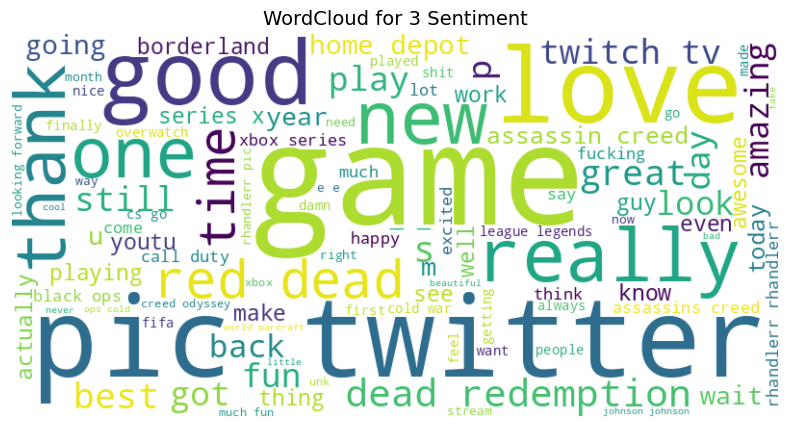

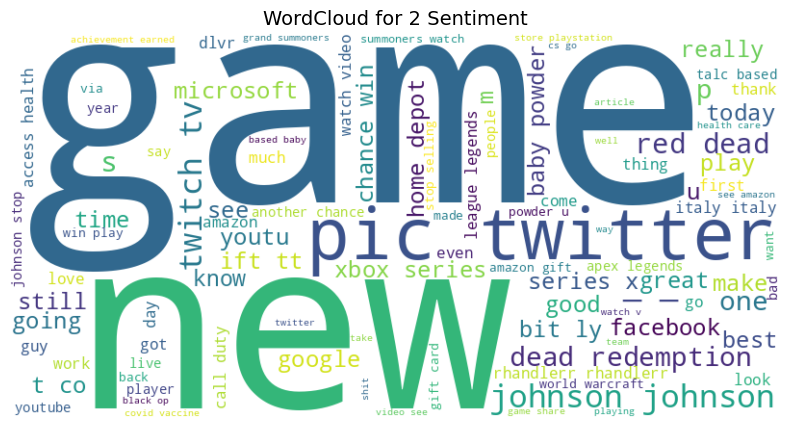

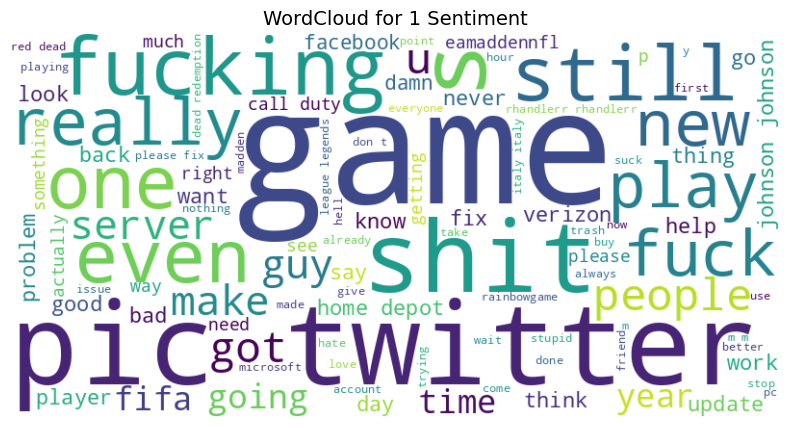

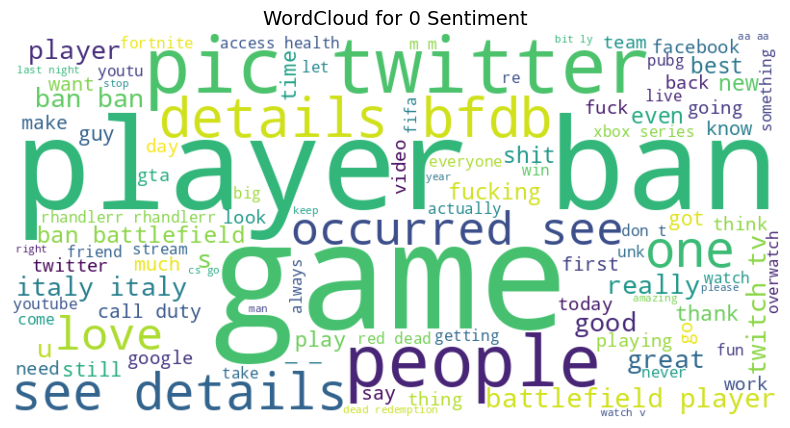

In [ ]:
from wordcloud import WordCloud

sentiments = train_dataset['Sentiment'].unique()
for i, sentiment in enumerate(sentiments, 1):
  text = "".join(train_dataset[train_dataset['Sentiment'] == sentiment]['CleanText'])
  if not text.strip():
        continue
  wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis',  # colormap
        min_font_size=10
    ).generate(text)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'WordCloud for {sentiment} Sentiment', fontsize=14)
  plt.axis('off')


## Words vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3)) # uses 10000 importent features and uses 1 word or w wod together

In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_vectorized.shape

(57939, 10000)

## Classification models Tranining/Testing

### Random Forest

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 89.58%


In [ ]:
print(classification_report(y_test, y_pred, target_names=encounter.classes_))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.82      0.88      2601
    Negative       0.87      0.94      0.90      4415
     Neutral       0.91      0.89      0.90      3498
    Positive       0.88      0.90      0.89      3971

    accuracy                           0.90     14485
   macro avg       0.90      0.89      0.89     14485
weighted avg       0.90      0.90      0.90     14485



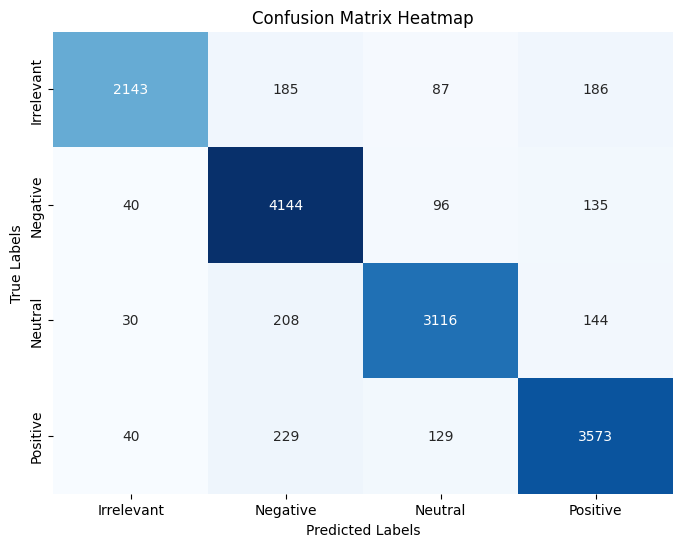

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=encounter.classes_, yticklabels=encounter.classes_)

plt.title('Confusion Matrix Heatmap Test')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Testing on the validation dataset

In [ ]:
train_cols = ["TweetId", "Topic", "Sentiment", "Content"]
val_dataset.columns = train_cols

In [ ]:
val_dataset['Sentiment'] = encounter.transform(val_dataset['Sentiment'])

In [ ]:
val_dataset['CleanText'] = val_dataset['Content'].apply(preprocess_text)

In [ ]:
x_val = val_dataset['CleanText']
y_val = val_dataset['Sentiment']

In [ ]:
x_val_vectorized = vectorizer.transform(x_val)

In [ ]:
y_pred = classifier.predict(x_val_vectorized)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 94.29%


In [ ]:
print(classification_report(y_val, y_pred, target_names=encounter.classes_))

              precision    recall  f1-score   support

  Irrelevant       0.99      0.91      0.95       171
    Negative       0.91      0.97      0.94       266
     Neutral       0.95      0.94      0.95       285
    Positive       0.94      0.94      0.94       277

    accuracy                           0.94       999
   macro avg       0.95      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



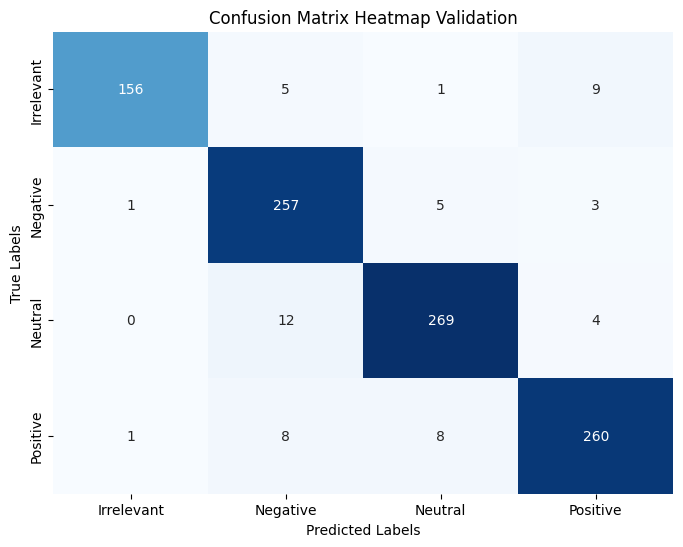

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=encounter.classes_, yticklabels=encounter.classes_)

plt.title('Confusion Matrix Heatmap Validation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()